In [10]:
%matplotlib notebook
# https://gist.github.com/brandoncurtis/33a67d9d402973face8d
#
# run this in a Jupyter (IPython) Notebook!
# modified from http://www.lebsanft.org/?p=48
# http://pyserial.readthedocs.org/en/latest/pyserial_api.html
import serial
import numpy as np
from matplotlib import pyplot as plt
from time import time


<IPython.core.display.Javascript object>


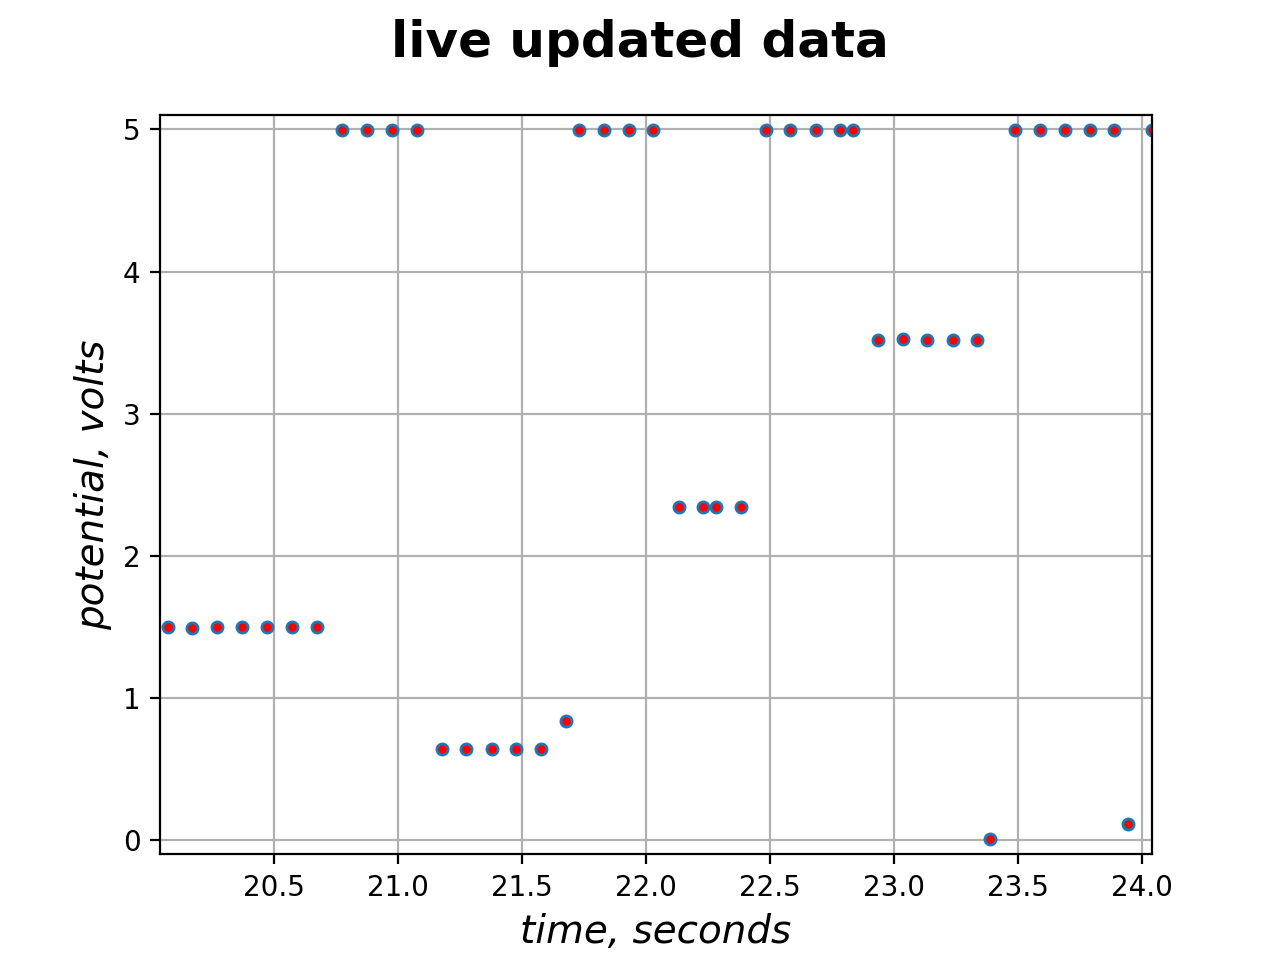

In [15]:
# If you're not using Linux, you'll need to change this
# check the Arduino IDE to see what serial port it's attached to
#ser = serial.Serial('/dev/ttyACM0', 115200)
#MAC
ser = serial.Serial('/dev/cu.usbmodem1411', 115200)

# set plot to animated
plt.ion() 

start_time = time()
timepoints = []
ydata = []
yrange = [-0.1,5.1]
view_time = 4 # seconds of data to view at once
duration = 24 # total seconds to collect data

fig1 = plt.figure()
# http://matplotlib.org/users/text_props.html
fig1.suptitle('live updated data', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('potential, volts', fontsize='14', fontstyle='italic')
plt.axes().grid(True)
line1, = plt.plot(ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
plt.ylim(yrange)
plt.xlim([0,view_time])

# flush any junk left in the serial buffer
ser.flushInput()
# ser.reset_input_buffer() # for pyserial 3.0+
run = True

# collect the data and plot a moving frame
while run:
    ser.reset_input_buffer()
#    data = ser.readline().split(' ')
    data = ser.readline()
  
    # sometimes the incoming data is garbage, so just 'try' to do this
    try:
        # store the entire dataset for later
        ydata.append(float(data)*5.0/1024)
        timepoints.append(time()-start_time)
        current_time = timepoints[-1]
        
        # update the plotted data
        line1.set_xdata(timepoints)
        line1.set_ydata(ydata)
        
        # slide the viewing frame along
        if current_time > view_time:
            plt.xlim([current_time-view_time,current_time])
            
        # when time's up, kill the collect+plot loop
        if timepoints[-1] > duration: run=False
    
    # if the try statement throws an error, just do nothing
    except: pass
    
    # update the plot
    fig1.canvas.draw()

ser.close()

<IPython.core.display.Javascript object>


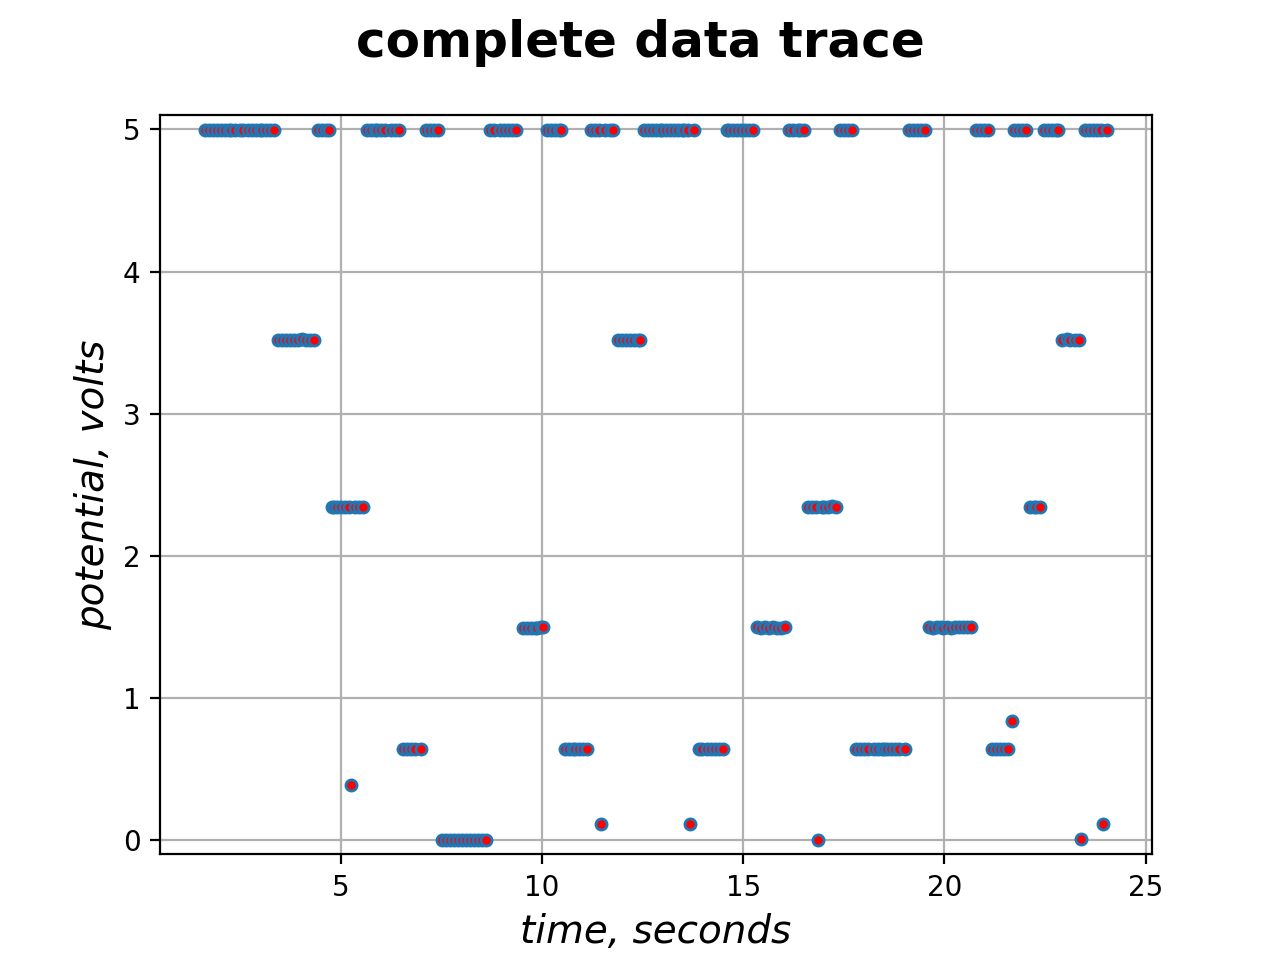

In [16]:
# plot all of the data you collected
fig2 = plt.figure()
# http://matplotlib.org/users/text_props.html
fig2.suptitle('complete data trace', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('potential, volts', fontsize='14', fontstyle='italic')
plt.axes().grid(True)

plt.plot(timepoints, ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
plt.ylim(yrange)
fig2.show()
